In [10]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:

train = pd.read_csv("train_multi.csv")
#test = pd.read_csv("test_new.csv")
#idcol = test['id']
#train.shape

In [25]:
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train_y = train['multi_labels']
train_y.shape

(159571,)

In [26]:
nrow_train = train.shape[0]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=2)

In [27]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
#x = list(df)

In [28]:
corpus_text = []
for i in range(len(train['comment_text'])):
    c = train['comment_text'][i]
    c= c.lower()
    c = c.split()
   # ps = PorterStemmer()
    c = [stemmer.stem(word) for word in c]
    c = ' '.join(c)
    corpus_text.append(c)

x = corpus_text
#stemmer.stem(x)

In [29]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

#vect = TfidfVectorizer(max_features=50000, lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,3),dtype=np.float32)
wordvect = TfidfVectorizer( lowercase=True, analyzer='word',stop_words= 'english', token_pattern=u'(?ui)\\b[a-z][a-z][a-z]+\\b',
                       max_features=10000, min_df=2 ,ngram_range=(1,2),dtype=np.float32)

#charvect = TfidfVectorizer( lowercase=True, analyzer='char', max_features=30000,ngram_range=(1,5),token_pattern=u'(?ui)\\b[a-z][a-z][a-z]+\\b')

In [30]:
wordfeatures = wordvect.fit(x)
#charfeatures = charvect.fit(x)

In [31]:
train_word_features = wordvect.transform(train['comment_text'])
#test_word_features = wordvect.transform(test['comment_text'])

#turain_char_features = charvect.transform(train['comment_text'])
#test_char_features = charvect.transform(test['comment_text'])

In [32]:
train =  train_word_features
#test = test_word_features

In [33]:
#train_y['toxic'].shape

In [34]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)



E:\anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
from sklearn.linear_model import LogisticRegression

In [ ]:
#pred = np.zeros((test.shape[0], len(label_cols)))

fig = plt.figure()

        

In [11]:
## Naive bayes, LogisticRegression and decision tree classifiers CrossValidation Box plot

In [49]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import metrics


LR: 0.914721 (0.001999)
NB: 0.907822 (0.002375)
CART: 0.895489 (0.002122)


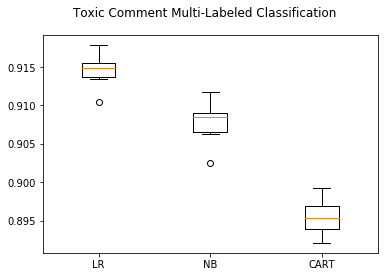

In [50]:
##Cross Validation 
# load dataset
X = train

Y = train_y
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('NB', MultinomialNB()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeClassifier()))


# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Toxic Comment Multi-Labeled Classification')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [52]:
##train_test_split

In [58]:
str=[]
n=range(0,2)
for i in n:
    for j in n:
        for k in n:
            for l in n:
                for m in n:
                    for o in n:
                        if(i!=0):
                            str.append("{}{}{}{}{}{}".format(i,j,k,l,m,o))
str.append("000000")
                        

In [64]:
#total 33 classes when treated as multi_Label Classification Problem
str[32]

'000000'

In [55]:
##Logistic Regression training Accuracy
cv_score =[]
for i in range(1,2):
    model = LogisticRegression(C=10,random_state = 4)
    #print('Building {} model for column:{''}'.format(i,col)) 
    model.fit(train,train_y)
    #cv_score.append(lr.score)
    #pred[:,i] = model.predict_proba(test)[:,1]
    print("Accuracy on training set: {:.3f}".format(model.score(train, train_y)))

KeyboardInterrupt: 

In [47]:
##Naive Bayes Training Accuracy
from sklearn.naive_bayes import MultinomialNB
cv_score =[]
for i in range(1,2):
    model = MultinomialNB()
    #print('Building {} model for column:{''}'.format(i,col)) 
    model.fit(train,train_y)
    #cv_score.append(lr.score)
    #pred[:,i] = model.predict_proba(test)[:,1]
    print("Accuracy on training set: {:.3f}".format(model.score(train, train_y)))

Accuracy on training set: 0.909


In [48]:
##Decision tree Training Accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
cv_score =[]
for i in range(1,2):
    model = DecisionTreeClassifier()
    #print('Building {} model for column:{''}'.format(i,col)) 
    model.fit(train,train_y)
    #cv_score.append(lr.score)
    #pred[:,i] = model.predict_proba(test)[:,1]
    print("Accuracy on training set: {:.3f}".format(model.score(train, train_y)))

Accuracy on training set: 0.994
